# Data analysis of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals

In [2]:
# Import image module
from IPython.display import Image
# Get the image
Image(url="../figures/banner.png")

## Load Modules and Preprocessing Functions

Read the current directory:

In [3]:
import os
print('The working directory is :{}'.format(os.getcwd()))

The working directory is :/Users/landajuelala1/Work/Projects/Cardioid_44549_LDRD_2018-2019/ecg2vm_public_dataset/notebooks


Load libraries:

In [4]:
import sys
print("Python is in %s" % sys.executable)
print("Python version is %s.%s.%s" % sys.version_info[:3])
import glob
import re, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

Python is in /Library/Developer/CommandLineTools/usr/bin/python3
Python version is 3.8.9


The function ``read_data_dirs`` is needed to read the numpy arrays:

In [5]:
def read_data_dirs(dirs_names, verbose = 0):
    
    file_pairs = []
    
    for dir in dirs_names:    
        all_files = sorted(glob.glob(dir + '/*.npy'))
        files_Vm=[]
        files_pECG=[]
        
        if verbose > 0:
            print('Reading files...',end='')
        for file in all_files:
            if 'VmData' in file:
                files_Vm.append(file)
            if 'pECGData' in file:
                files_pECG.append(file)
        if verbose > 0:        
            print(' done.')
        
        if verbose > 0:
            print('len(files_pECG) : {}'.format(len(files_pECG)))
            print('len(files_Vm) : {}'.format(len(files_Vm)))
        
        for i in range(len(files_pECG)):  
            VmName =  files_Vm[i]
            VmName = VmName.replace('VmData', '')
            pECGName =  files_pECG[i]
            pECGName = pECGName.replace('pECGData', '')            
            if pECGName == VmName :
                file_pairs.append([files_pECG[i], files_Vm[i]])
            else:
                print('Automatic sorted not matching, looking for pairs ...',end='')
                for j in range(len(files_Vm)):
                    VmName =  files_Vm[j]
                    VmName = VmName.replace('VmData', '')
                    if pECGName == VmName :
                        file_pairs.append([files_pECG[i], files_Vm[j]])
                print('done.')       
    return file_pairs

## Load the dataset

In [17]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR='../'
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)

file_pairs = read_data_dirs(data_dirs)
len(file_pairs)

16117

## Plot one simulation

Case 213 : ../data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.050.pattern.11.volunteer.v9.npy


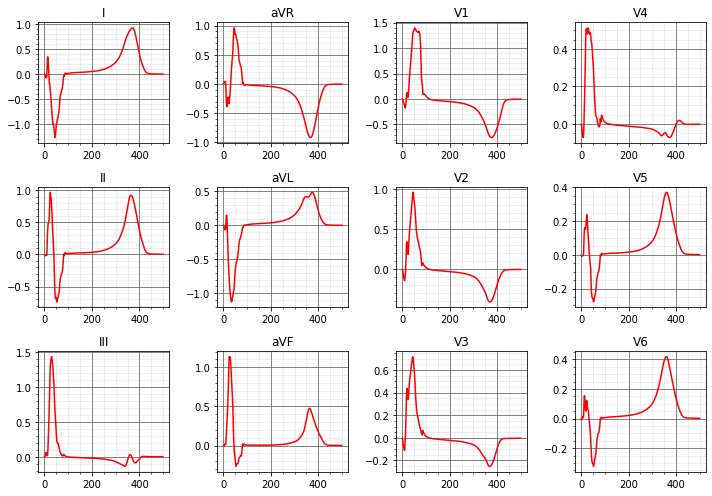

In [18]:
row = 3; column = 4
scaling_ecg = "none"
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]

row = 3; column = 4    
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12}

index = np.random.choice(range(len(file_pairs)),1)
index = [213]

for case in index:

    print('Case {} : {}'.format(case, file_pairs[case][0]))
    pECGData = np.load(file_pairs[case][0])
    VmData = np.load(file_pairs[case][1])
    
    dataECG = torch.Tensor(pECGData)               # dataECG  : RA LA LL RL V1 V2 V3 V4 V5 V6
    ecg12aux = torch.zeros(dataECG.shape[0],12)    # ecg12aux : i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5, v6
    WilsonLead = 0.33333333 * (dataECG[:,0] + dataECG[:,1] + dataECG[:,2])           
    # Lead I: LA - RA
    ecg12aux[:,0] = dataECG[:,1] - dataECG[:,0]
    # Lead II: LL - RA
    ecg12aux[:,1] = dataECG[:,2] - dataECG[:,0]
    # Lead III: LL - LA
    ecg12aux[:,2] = dataECG[:,2] - dataECG[:,1]
    # Lead aVR: 3/2 (RA - Vw)
    ecg12aux[:,3] = 1.5*(dataECG[:,0] - WilsonLead)
    # Lead aVL: 3/2 (LA - Vw)
    ecg12aux[:,4] = 1.5*(dataECG[:,1] - WilsonLead)
    # Lead aVF: 3/2 (LL - Vw)
    ecg12aux[:,5] = 1.5*(dataECG[:,2] - WilsonLead)
    # Lead V1: V1 - Vw
    ecg12aux[:,6] = dataECG[:,4] - WilsonLead
    # Lead V2: V2 - Vw
    ecg12aux[:,7] = dataECG[:,5] - WilsonLead
    # Lead V3: V3 - Vw
    ecg12aux[:,8] = dataECG[:,6] - WilsonLead
    # Lead V4: V4 - Vw
    ecg12aux[:,9] = dataECG[:,7] - WilsonLead
    # Lead V5: V5 - Vw
    ecg12aux[:,10] = dataECG[:,8] - WilsonLead
    # Lead V6: V6 - Vw
    ecg12aux[:,11] = dataECG[:,9] - WilsonLead
    pECGData = ecg12aux
    
    for i in range(pECGData.shape[1]):
        plt.subplot(row, column, reorder[i + 1])
        plt.plot(pECGData[0:500,i],'r')
        plt.title(titles[i])
        plt.grid(visible=True, which='major', color='#666666', linestyle='-')
        plt.minorticks_on()
        plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        #plt.xlabel('msec')
        #plt.ylabel('mV')
    plt.tight_layout()
    plt.show()

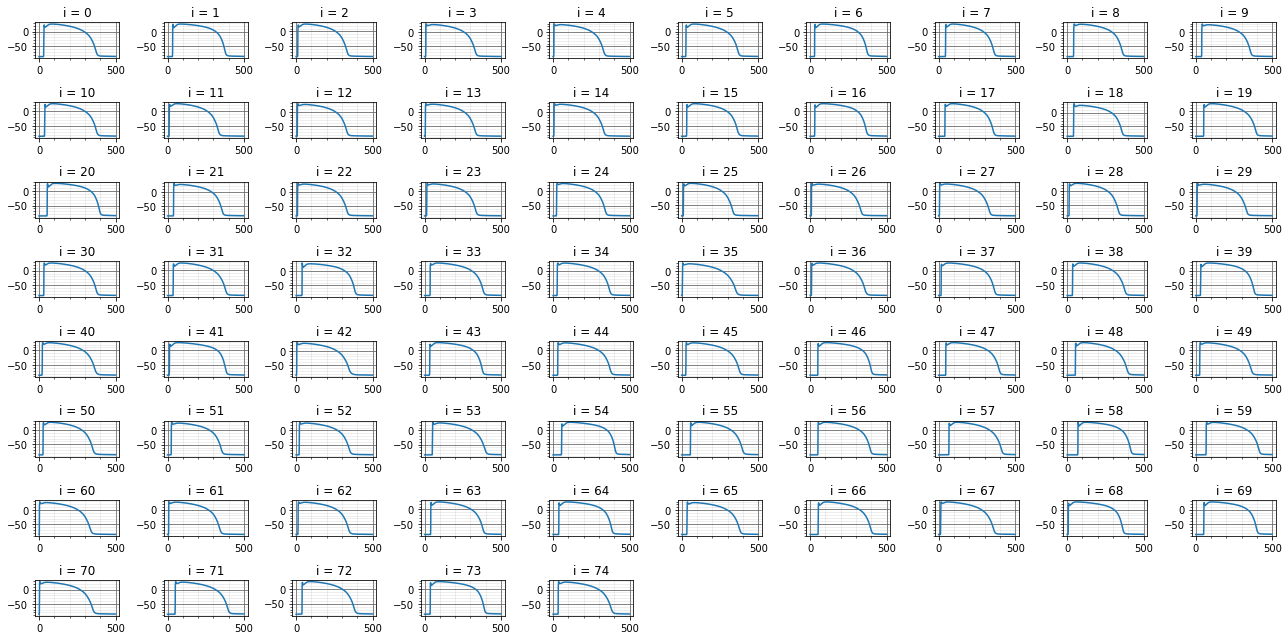

In [19]:
num_timesteps = 500
plt.figure(figsize=(18, 9))
row = 7; column = 10

index = np.random.choice(range(len(file_pairs)),1)
index = [213]

for case in index:
    VmData = np.load(file_pairs[case][1])
    randomIndex = range(VmData.shape[1])
    for count, i in enumerate(randomIndex):
        plt.subplot(8, 10, count + 1)
        plt.plot(VmData[0:num_timesteps,i])
        plt.title(f'i = {i}')
        plt.grid(visible=True, which='major', color='#666666', linestyle='-')
        plt.minorticks_on()
        plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()